# Ford GoBike System Data
## by Abdullah Adel El damanhoury

## Preliminary Wrangling

> This data set includes information about individual rides made
in a bike-sharing system covering the greater San Francisco
Bay area.

In [316]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [317]:
# load in the dataset into a pandas dataframe, print statistics

bike_df= pd.read_csv('201902-fordgobike-tripdata.csv')

In [318]:
# high-level overview of data shape and composition
print(bike_df.shape)
print("-----------------------------------------")
print(bike_df.dtypes)
print("-----------------------------------------")
print(bike_df.head(6))

(183412, 16)
-----------------------------------------
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
-----------------------------------------
   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  20

In [319]:
# Display bike_df information
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [320]:
# descriptive statistics for numeric variables
bike_df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [321]:
# Display the number of duplicated data
sum(bike_df.duplicated())

0

In [322]:
# Display the number of null values for each columns
bike_df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [323]:
# Remove loans with missing borrower APR information
#bike_df = bike_df[~bike_df.member_birth_year.isna()]

In [324]:
bike_df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [325]:
# check where user_type has the most counts
bike_df.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [326]:
# check where member_gender has the most counts
bike_df.member_gender.value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [327]:
#Extract days and months from start_time
bike_df.start_time = bike_df.start_time.apply(pd.to_datetime)

bike_df['Day'] = bike_df['start_time'].dt.weekday_name
#bike_df['Month'] = bike_df.start_time.dt.month

In [328]:
# Create Age column
bike_df['age'] = bike_df['member_birth_year'].apply(lambda n: 2021 - n)

In [329]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 18 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null datetime64[ns]
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
Day                        183412 non-null object
age                       

In [330]:
# Display the number of null values for each columns
bike_df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
Day                           0
age                        8265
dtype: int64

In [331]:
bike_df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Day,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,Thursday,37.0
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,Thursday,NaN
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,Thursday,49.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,Thursday,32.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,Thursday,47.0


### What is the structure of your dataset?

> There are 183412 trips in the dataset with 16 features (duration_sec , start_time , end_time , start_station_id , start_station_name , start_station_latitude , start_station_longitude , end_station_id , end_station_name , end_station_latitude , end_station_longitude , bike_id , user_type , member_birth_year , member_gender , bike_share_for_all_trip)

### What is/are the main feature(s) of interest in your dataset?

> I'm interested in user_type , member_gender , member_birth_year and  trips in terms of time and how do these features decide the answers on the quesions such as : 
- When are most trips taken in terms of time ?
- How long does the average trip take?
- Does the  most trips depend on user_type or time?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think features such as user_type , member_gender , member_birth_year and  trips in terms of time will help support my investigation .

## Univariate Exploration


> How is the distribution of Trip duration in seconds ?

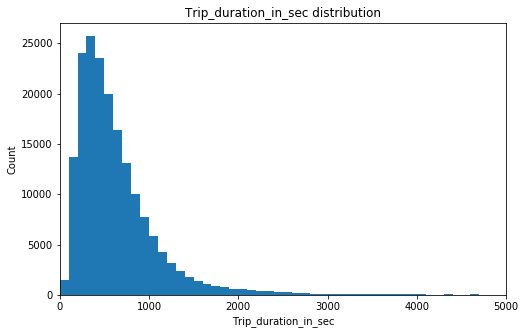

In [332]:
# Duration_sec distribution
binsize = 100
bins = np.arange(0, bike_df['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bike_df, x = 'duration_sec', bins = bins)
plt.xlim(0, 5000)

plt.xlabel('Trip_duration_in_sec')
plt.ylabel('Count')
plt.title('Trip_duration_in_sec distribution')
plt.show()

> Observations :
- This distribution is right-skewed .
- The lower duration the more trips .

## Next: Age

> How is the distribution of ages in years ?

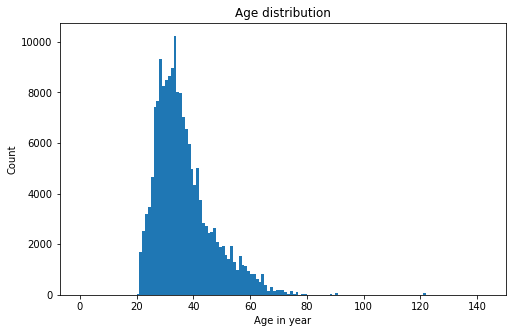

In [333]:
# Age distribution

bins = np.arange(0, bike_df['age'].max()+1, 1)

plt.figure(figsize=[8, 5])
plt.hist(data = bike_df, x = 'age', bins = bins)
plt.xlabel('Age in year')
plt.ylabel('Count')
plt.title('Age distribution')
plt.show()

> Observations :
- This distribution is right-skewed .
- The lower ages the more trips 

### Next : Days

> What is the trips count for each day in week ?

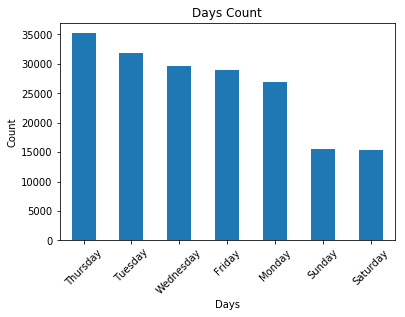

In [334]:
# Display the counts of Days

bike_df['Day'].value_counts().plot(kind='bar',color=sb.color_palette()[0])
plt.title('Days Count')
plt.xlabel('Days')
plt.ylabel('Count')
plt.fontsize = 14
plt.figsize=(14,14)
plt.xticks(rotation=45)
plt.show()

> Observation : Thursday is the day that has the most trips .

## Next : member gender

> What is the count of males , females and others ?

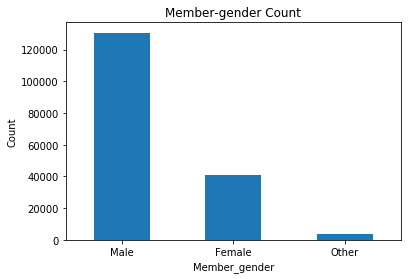

In [335]:
# Display the counts of Months

bike_df['member_gender'].value_counts().plot(kind='bar',color=sb.color_palette()[0])
plt.title('Member-gender Count')
plt.xlabel('Member_gender')
plt.ylabel('Count')
plt.fontsize = 14
plt.figsize=(14,14)
plt.xticks(rotation=360)
plt.show()

> Observation : It is very clear that the males is the gender that has the most trips .

## Next: user type

> What is the percentage of subscribers and customers ?

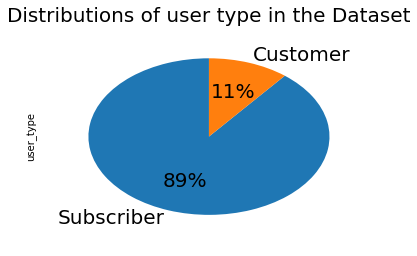

In [336]:
# Distributions of user type in the Dataset in pie chart
bike_df.user_type.value_counts(sort=True).plot.pie(startangle=90,  radius = 0.9,autopct='%1.0f%%',fontsize=20)
plt.title('Distributions of user type in the Dataset', fontsize=20)
plt.show()


> Observation : The subscribers are the most users trips ( 89 %)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Duration_sec and Age distributions are right-skewed that the lower duration and lower ages the more trips .It is very clear that Thursday is the day that has the most trips and the subscribers are the most users trips ( 89 %).There were not unusual points . Yes, Ineed some transformations .

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There were not unusual distributions such that the duration_sec distribution is right-skewed that the lower duration and lower ages the more trips and this result is very expected .

## Bivariate Exploration


> How are the duration-in-seconds distribution per ages ?

In [337]:
numeric_vars = ['duration_sec', 'age']
categoric_vars = ['Day', 'member_gender', 'user_type']

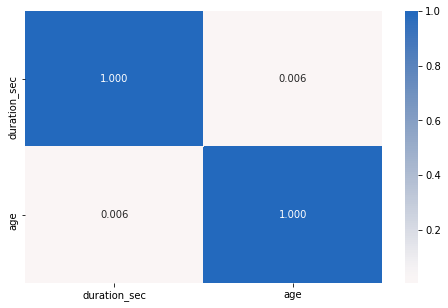

In [338]:

# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(bike_df[numeric_vars].corr(), annot = True, fmt = '.3f',cmap = 'vlag_r', center = 0)
plt.show()

C:\Users\abd49\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


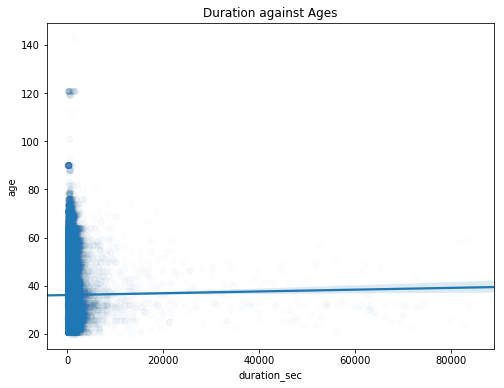

In [339]:
# plot matrix: sample 500 trips so that plots are clearer and
# they render faster
#samples = np.random.choice(bike_df.shape[0], 300, replace = False)
#bike_df_samp = bike_df.loc[samples,:]

#g = sb.PairGrid(data = bike_df_samp, vars = numeric_vars)
#g.map_offdiag(plt.scatter)

plt.figure(figsize = [8, 6])
sb.regplot(data = bike_df, x = 'duration_sec', y = 'age', scatter_kws={'alpha':0.01});
plt.title('Duration against Ages')
plt.show()


> Observation : Although there is slightly positive correlation between age and duration but it doesn't mean any thing . As a result i will consider that there is no any positive relationship

## Next : user_type vs Day

> How are subscribers trips and customers trips counted per weekday ?

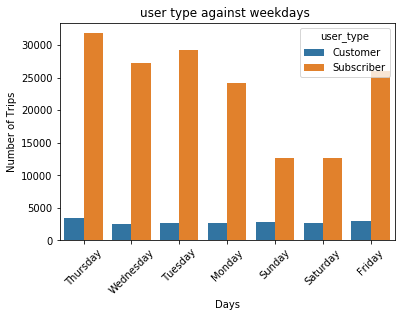

In [340]:
#subscribers trips and customers trips per weekday
sb.countplot(data=bike_df, x='Day', hue='user_type', order= list(bike_df.Day.unique()))
plt.xlabel('Days')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.title("user type against weekdays ")
plt.show()

> Observation : Subscribers are much more than customers along the week. This might be because the subscribers use the bikes for work regularly.

## Next : member gendere Vs duration

> How many Females , males and others ride bikes per duration in seconds ?

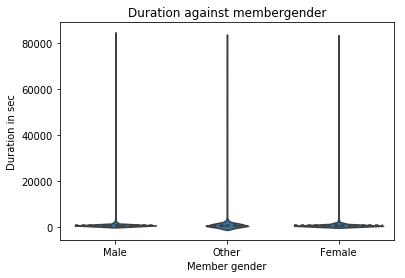

In [341]:
# Create duration in hour column
#bike_df['Duration_hour'] = bike_df['duration_sec'] / 3600

# relationship between member gendere and duration
#plt.figure(figsize = [10, 5])
sb.violinplot(data=bike_df, x='member_gender', y='duration_sec', color=sb.color_palette()[0] , inner='quartile')
plt.xlabel('Member gender')
plt.ylabel('Duration in sec')
plt.title('Duration against membergender');

> Observation : Females ride bikes slightly more than males and almost the same duration. Unlike the others that they ride less times than males and females but more duration .

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- there was slightly positive correlation between age and duration but it doesn't mean any thing . As a result I will consider that there is no any positive relationship .
- Subscribers are much more than customers along the week. This might be because the subscribers use the bikes for work regularly.
- Females ride bikes slightly more than males and almost the same duration. Unlike the others that they ride less times than males and females but more duration .

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> No, there was not interesting relationships between the other features 

## Multivariate Exploration


- Finding out Trip duration_sec vs Day vs member_gender

> How many Females , males and others ride bikes per duration in seconds per weekdays ?

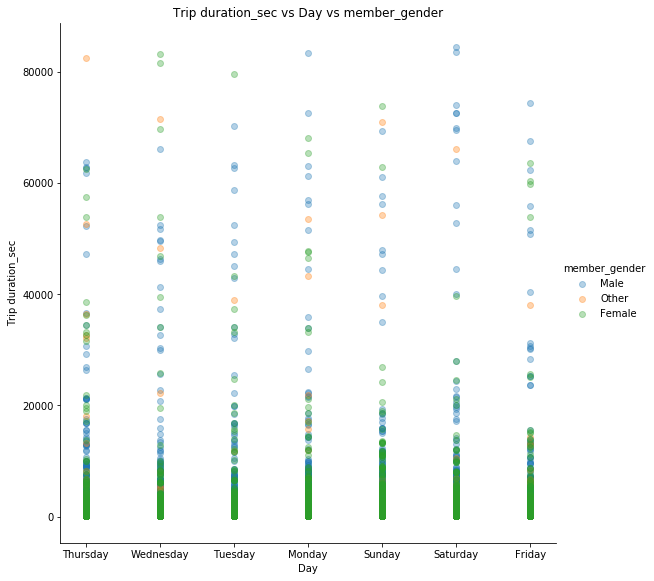

In [342]:
# Finding out Trip duration_sec vs Day vs member_gender
g = sb.FacetGrid(data =  bike_df, hue = 'member_gender', height = 8)
g.map(plt.scatter, 'Day','duration_sec', alpha = 1/3)
g.add_legend()
plt.title('Trip duration_sec vs Day vs member_gender')
plt.xlabel('Day')
plt.ylabel('Trip duration_sec');

- Observation : Females have more trips than males but males have more duration

## Next :  Days vs Gender vs User Type

> What is daily Usage of the Bikes per Gender and User Type ?

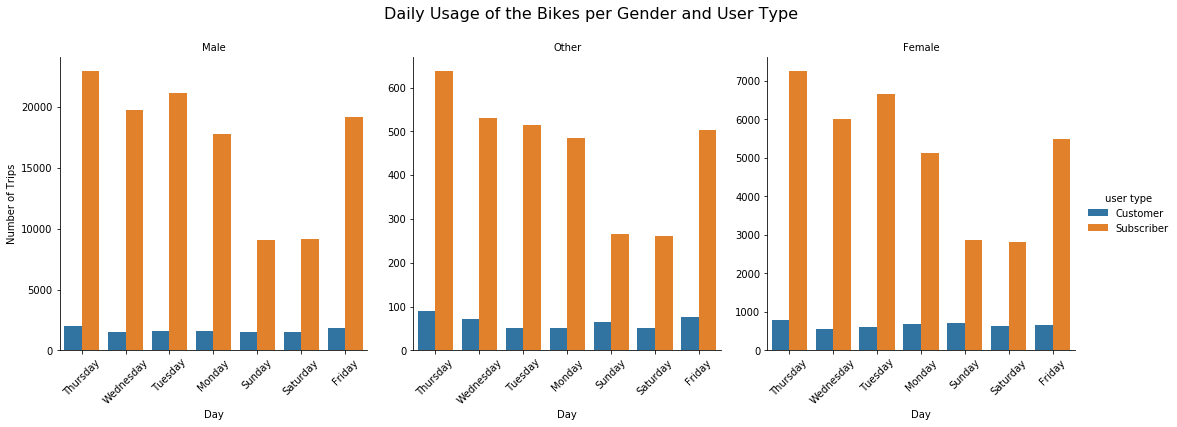

In [343]:

g = sb.catplot(data=bike_df, x='Day', col="member_gender", hue="user_type", kind='count', sharey = False, order = list(bike_df.Day.unique()))
g.set_axis_labels("Day", "Number of Trips")
g._legend.set_title('user type')
g.set_titles("{col_name}")
g.fig.suptitle('Daily Usage of the Bikes per Gender and User Type', y=1.07, fontsize=16)
g.set_xticklabels(rotation=45);


> Observation : It is clear saturday an sunday are not  popular for customers or subscribers unlike thursday to ride bikes .

## Next : Age vs gender vs day

> What is the ages of males , females and others who ride bikes per weekdays ?

C:\Users\abd49\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


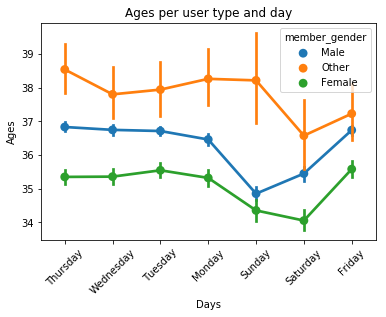

In [344]:
# plot age vs gender vs day
sb.pointplot(data = bike_df, x = 'Day', y = 'age', hue = 'member_gender')
plt.title('Ages per user type and day')
plt.ylabel('Ages')
plt.xlabel('Days')
plt.xticks(rotation=45)
plt.show()

> Observation : It seems that the females are younger the male and others with ages in range 34 - 36 while others are older than males and females with range 37 - 39 years old .

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- Females have more trips the whole week days than males but males have very much more duration .
-  It is clear saturday an sunday are not popular for customers or subscribers unlike thursday to ride bikes 
-  It seems that the females are younger the male and others with ages in range 34 - 36 while others are older than males and females with range 37 - 39 years old .

### Were there any interesting or surprising interactions between features?

> No , there were not interesting or surprising interactions between features .